<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r15-jbdrf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [245]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-3-r15.csv?token=AKVFSOB5BRZZ363CAFC5QIS6ZQO3G')
print(df.shape)
df

(19630, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,789,3,4,2,1,4,3,9,30,14,27,11,17,2,1,0.500000,8,1,1,1,1,1,12,2,8,136,6,27,18,1
1,847,3,4,2,1,4,3,9,30,14,27,11,18,2,1,0.500000,8,1,1,1,1,1,12,2,8,144,6,27,18,1
2,1229,3,4,2,1,4,3,9,28,12,27,11,25,4,3,0.750000,16,1,1,1,1,1,12,2,8,200,6,27,18,1
3,1268,3,4,2,1,4,3,9,28,12,27,11,26,4,3,0.750000,16,1,1,1,1,1,12,2,8,208,6,27,18,1
4,1460,3,4,2,1,4,3,9,29,13,27,11,29,3,2,0.666667,12,1,1,1,1,1,12,2,8,232,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19625,3268261,3,4,6,3,2,3,9,30,14,27,11,20036,2,1,0.500000,22,1,1,1,1,1,12,18,36,721296,18,27,54,1
19626,3268268,3,4,6,4,2,3,9,30,14,27,11,20036,2,1,0.500000,29,1,1,1,1,1,12,24,48,961728,18,27,54,1
19627,3268275,3,4,6,5,3,3,9,30,14,27,11,20036,2,1,0.500000,36,1,1,1,1,1,12,30,90,1803240,18,27,54,1
19628,3268276,3,4,2,1,4,3,10,30,14,27,11,20037,2,1,0.500000,36,1,1,1,1,1,12,2,8,160296,6,30,18,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-1-r15.csv?token=AKVFSODVUEY73WZJEBWPWFS6ZQO3K',nrows=33000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-6-r15.csv?token=AKVFSOCUMJHGFHBNNWYCLP26ZQO3O',nrows=33000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-9-r15.csv?token=AKVFSOH4HQ6CETRDKEDGV2S6ZQO3U',nrows=33000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-14-r15.csv?token=AKVFSOBHZZKOLLFSMH7STEC6ZQO32')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-5-r15.csv?token=AKVFSODXLKHAMBOEKQO4RZ26ZQPC2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-12-r15.csv?token=AKVFSOBUZDKVVTOO25ERH4S6ZQPC6')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-15-r15.csv?token=AKVFSOGNRQTGJKB4FF2DJTK6ZQPDE',nrows=60000)

In [247]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(29188, 30)
(29188, 30)
(29220, 30)
(35988, 30)
(18792, 30)
(25548, 30)
(60000, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [249]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,2,2,0,0.000000,4,7,1,7,7,49,0,1,4,8,3,27,9,1
1,11,3,4,1,1,4,3,9,14,14,23,7,3,3,1,0.333333,8,1,1,1,1,1,12,1,4,12,3,27,9,0
2,19,3,4,1,1,4,3,9,12,12,23,7,2,5,3,0.600000,16,1,1,1,1,1,12,1,4,8,3,27,9,1
3,62,0,3,4,1,1,5,17,23,7,15,15,2,2,2,1.000000,12,6,2,7,12,84,0,4,4,8,20,85,100,1
4,63,0,3,4,2,2,5,17,23,7,15,15,2,2,2,1.000000,13,5,3,7,15,105,0,8,16,32,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247549,3271876,3,4,5,2,2,3,9,12,12,23,7,20043,5,3,0.600000,23,1,1,1,1,1,12,10,20,400860,15,27,45,1
247550,3271883,3,4,5,3,2,3,9,12,12,23,7,20043,5,3,0.600000,30,1,1,1,1,1,12,15,30,601290,15,27,45,1
247551,3271890,3,4,5,4,2,3,9,12,12,23,7,20043,5,3,0.600000,37,1,1,1,1,1,12,20,40,801720,15,27,45,1
247552,3271897,3,4,5,5,3,3,9,12,12,23,7,20043,5,3,0.600000,44,1,1,1,1,1,12,25,75,1503225,15,27,45,1


In [250]:
df.shape

(247554, 30)

Test Data

In [251]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-2-r15.csv?token=AKVFSOBGFS4NDPSDSPWTLVC6ZQPJI',nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-5-r15.csv?token=AKVFSOFH6ATV5TMEBV4PMG26ZQPJM',nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-10-r15.csv?token=AKVFSOB6HTMCBTDHDH6DJFK6ZQPJS',nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-12-r15.csv?token=AKVFSOCBOTOSQVKGBROFLX26ZQPJY',nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-13-r15.csv?token=AKVFSOCBW45DBWKAVGH3ZOS6ZQPJ6',nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-15-r15.csv?token=AKVFSOBW7KUN7LQJC6N2W226ZQPKG',nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-10-r15.csv?token=AKVFSOFNSU6YPOSK2R63PR26ZQPRE',nrows=30000)
df5.shape

(29188, 30)

In [252]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,789,3,4,2,1,4,3,9,30,14,27,11,25,2,1,0.50,8,1,1,1,1,1,12,2,8,200,6,27,18,0
1,806,3,4,2,1,4,3,9,30,14,27,11,26,2,1,0.50,8,1,1,1,1,1,12,2,8,208,6,27,18,0
2,871,3,4,2,1,4,3,9,30,14,27,11,27,2,1,0.50,8,1,1,1,1,1,12,2,8,216,6,27,18,0
3,1229,3,4,2,1,4,3,9,28,12,27,11,37,4,3,0.75,16,1,1,1,1,1,12,2,8,296,6,27,18,0
4,1251,3,4,2,1,4,3,9,28,12,27,11,38,4,3,0.75,16,1,1,1,1,1,12,2,8,304,6,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29183,3269782,3,4,6,3,2,3,9,30,14,27,11,30059,2,1,0.50,22,1,1,1,1,1,12,18,36,1082124,18,27,54,0
29184,3269789,3,4,6,4,2,3,9,30,14,27,11,30059,2,1,0.50,29,1,1,1,1,1,12,24,48,1442832,18,27,54,0
29185,3269796,3,4,6,5,3,3,9,30,14,27,11,30059,2,1,0.50,36,1,1,1,1,1,12,30,90,2705310,18,27,54,0
29186,3269797,3,4,2,1,4,3,10,30,14,27,11,30060,2,1,0.50,36,1,1,1,1,1,12,2,8,240480,6,30,18,0


In [253]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [255]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.205124,0.250325,0.005272,-0.007877,-0.480320,-0.356485,0.063109,-0.162238,-0.618767,-0.736673,-0.153836,-0.145991,-0.031345,-0.107886,-0.075905,-0.058035,0.484120,0.128494,0.103530,0.106078,0.027470,-0.437452,-0.236994,-0.074212
inport,-0.205124,1.000000,0.000942,0.022555,-0.033588,0.057647,-0.166288,0.104380,0.319780,0.541935,0.747997,0.295563,-0.130115,-0.210398,-0.207156,-0.173526,-0.137495,0.737129,0.028323,0.014136,0.063300,0.026942,-0.036210,0.049906,-0.154606
cache_coherence_type,0.250325,0.000942,1.000000,0.347710,-0.518195,-0.177250,-0.227865,0.089741,-0.025225,-0.114545,-0.167198,-0.354259,-0.031039,-0.080983,-0.068150,-0.040928,-0.025326,0.180727,0.538619,0.426095,0.343454,0.895895,-0.202298,0.541229,-0.094151
flit_id,0.005272,0.022555,0.347710,1.000000,-0.056512,0.091188,0.017030,-0.001365,-0.007981,0.044987,0.017286,0.458601,0.003318,0.041356,0.027178,0.037849,0.025260,0.029156,0.964224,0.925556,0.651390,0.380496,0.061559,0.318760,0.026906
flit_type,-0.007877,-0.033588,-0.518195,-0.056512,1.000000,-0.135894,-0.025385,0.002029,0.011863,-0.067027,-0.025738,0.403453,-0.084817,0.073039,-0.007166,-0.018802,-0.011646,-0.043437,-0.141663,0.121019,0.084561,-0.567055,-0.091742,-0.475047,-0.040115
vnet,-0.480320,0.057647,-0.177250,0.091188,-0.135894,1.000000,0.919510,-0.194774,0.045533,0.234969,0.356398,-0.127039,0.207119,0.168519,0.228525,0.150813,0.085839,-0.280146,-0.046044,-0.051131,-0.128974,0.278435,0.985994,0.731628,0.299890
vc,-0.356485,-0.166288,-0.227865,0.017030,-0.025385,0.919510,1.000000,-0.197232,-0.037717,0.066373,0.125891,-0.164917,0.212601,0.214535,0.259854,0.181974,0.113976,-0.389872,-0.114779,-0.093168,-0.161698,0.192705,0.972188,0.627797,0.301525
traversal_id,0.063109,0.104380,0.089741,-0.001365,0.002029,-0.194774,-0.197232,1.000000,-0.022556,0.020529,0.026273,0.080413,-0.308446,-0.308418,-0.375279,-0.290491,-0.220149,0.145185,0.043585,0.035892,0.552506,-0.000345,-0.199741,-0.104255,-0.423595
hop_count,-0.162238,0.319780,-0.025225,-0.007981,0.011863,0.045533,-0.037717,-0.022556,1.000000,0.738474,0.406694,0.371670,-0.030390,-0.085773,-0.070669,-0.077940,-0.067244,0.113938,-0.049346,-0.028405,-0.030235,-0.004063,0.011127,0.021431,0.092587
current_hop,-0.618767,0.541935,-0.114545,0.044987,-0.067027,0.234969,0.066373,0.020529,0.738474,1.000000,0.810141,0.500521,0.014458,-0.124766,-0.067107,-0.060136,-0.045185,0.049825,-0.023187,-0.029797,-0.008762,-0.005717,0.168166,0.121417,0.017155


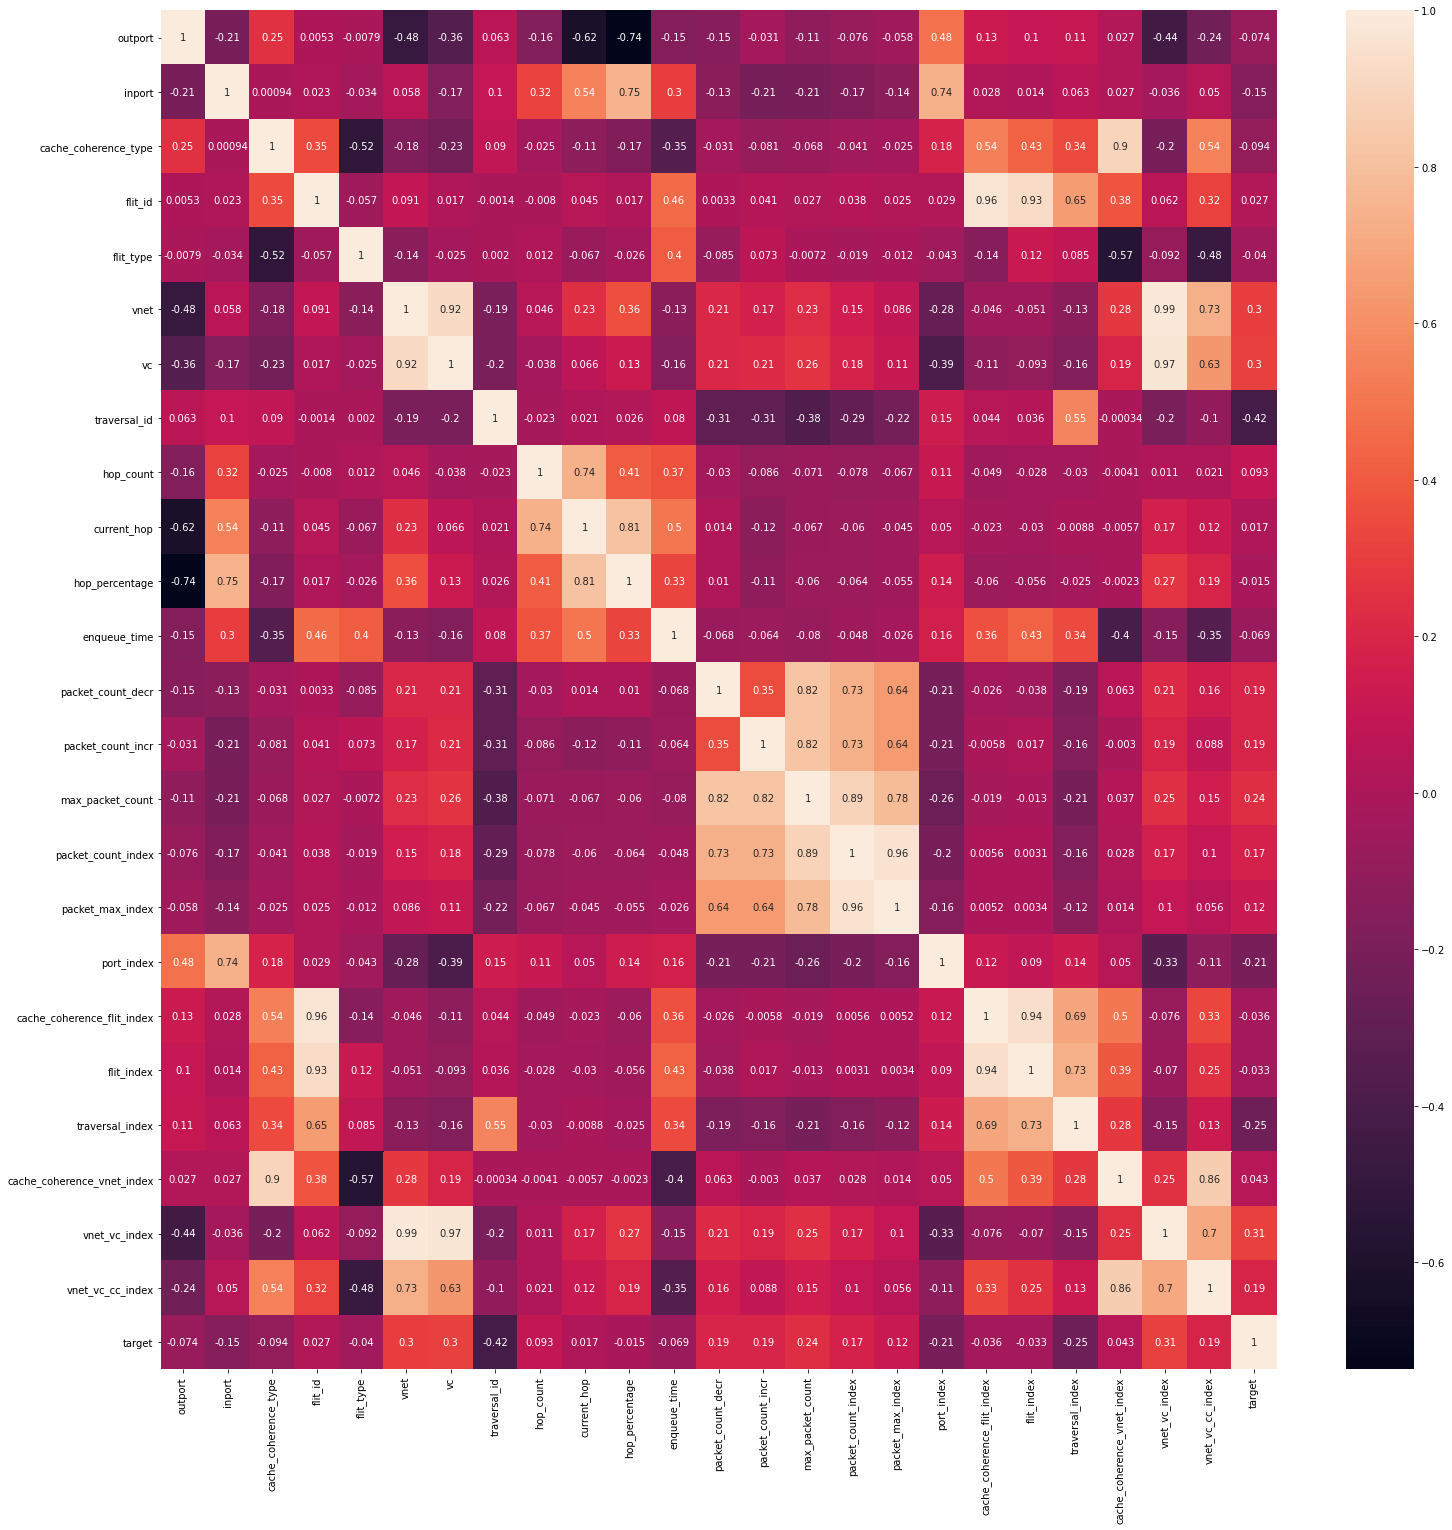

In [256]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [257]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,0,1,1,4,3,9,2,2,0,0.000000,4,7,1,7,7,49,0,1,4,8,3,27,9
1,3,4,1,1,4,3,9,3,3,1,0.333333,8,1,1,1,1,1,12,1,4,12,3,27,9
2,3,4,1,1,4,3,9,2,5,3,0.600000,16,1,1,1,1,1,12,1,4,8,3,27,9
3,0,3,4,1,1,5,17,2,2,2,1.000000,12,6,2,7,12,84,0,4,4,8,20,85,100
4,0,3,4,2,2,5,17,2,2,2,1.000000,13,5,3,7,15,105,0,8,16,32,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247549,3,4,5,2,2,3,9,20043,5,3,0.600000,23,1,1,1,1,1,12,10,20,400860,15,27,45
247550,3,4,5,3,2,3,9,20043,5,3,0.600000,30,1,1,1,1,1,12,15,30,601290,15,27,45
247551,3,4,5,4,2,3,9,20043,5,3,0.600000,37,1,1,1,1,1,12,20,40,801720,15,27,45
247552,3,4,5,5,3,3,9,20043,5,3,0.600000,44,1,1,1,1,1,12,25,75,1503225,15,27,45


In [258]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,0.206897,0.000000,0.206897,0.025105,0.006668,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.166667,0.333333,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.500000,0.600000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.333333,0.333333,1.000000,0.102564,0.172414,0.034483,0.206897,0.046025,0.011529,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
4,0.00,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.000000,0.115385,0.137931,0.068966,0.206897,0.058577,0.014446,0.0,0.241379,0.139535,0.000009,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247549,0.75,1.00,0.666667,0.25,0.333333,0.0,0.000,0.666235,0.833333,0.500000,0.600000,0.243590,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.310345,0.186047,0.148059,0.666667,0.000000,0.395604
247550,0.75,1.00,0.666667,0.50,0.333333,0.0,0.000,0.666235,0.833333,0.500000,0.600000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.482759,0.302326,0.222091,0.666667,0.000000,0.395604
247551,0.75,1.00,0.666667,0.75,0.333333,0.0,0.000,0.666235,0.833333,0.500000,0.600000,0.423077,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.655172,0.418605,0.296122,0.666667,0.000000,0.395604
247552,0.75,1.00,0.666667,1.00,0.666667,0.0,0.000,0.666235,0.833333,0.500000,0.600000,0.512821,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.827586,0.825581,0.555231,0.666667,0.000000,0.395604


In [259]:
train_X[train_X.duplicated()].shape

(9654, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [261]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.50,0.061538,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.166667,0.50,0.061538,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000003,0.166667,0.000000,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.2,0.166667,0.50,0.061538,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000006,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000400,0.6,0.500000,0.75,0.184615,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000035,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000433,0.6,0.500000,0.75,0.184615,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29183,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.276923,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399956,0.833333,0.000000,0.833333
29184,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.384615,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533299,0.833333,0.000000,0.833333
29185,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.492308,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29186,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.2,0.166667,0.50,0.492308,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.088824,0.166667,0.333333,0.166667


In [262]:
test_X[test_X.duplicated()].shape

(0, 24)

In [263]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000003,0.166667,0.333333,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000006,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000400,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000035,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000433,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399956,0.833333,0.000000,0.833333
29216,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.367647,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533299,0.833333,0.000000,0.833333
29217,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29218,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.088824,0.166667,0.333333,0.166667


In [264]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000003,0.166667,0.000000,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000006,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000400,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000035,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000433,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399956,0.833333,0.000000,0.833333
29216,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.367647,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533299,0.833333,0.000000,0.833333
29217,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29218,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.088824,0.166667,0.333333,0.166667


In [265]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(22, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.500000,0.6,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000352,0.8,0.500000,0.6,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000742,0.8,0.500000,0.6,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000
3,0.75,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000821,0.2,0.166667,0.5,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000078,0.166667,0.000000,0.166667
4,0.75,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000899,0.2,0.166667,0.5,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000085,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.75,0.666667,0.25,0.333333,0.0,0.000000,0.999961,1.0,1.000000,1.0,0.455882,0.0,0.0,0.0,0.0,0.0,0.0,0.310345,0.186047,0.222270,0.666667,0.000000,0.666667
29996,0.00,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999961,1.0,1.000000,1.0,0.558824,0.0,0.0,0.0,0.0,0.0,0.0,0.482759,0.302326,0.333408,0.666667,0.000000,0.666667
29997,0.00,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999961,1.0,1.000000,1.0,0.661765,0.0,0.0,0.0,0.0,0.0,0.0,0.655172,0.418605,0.444546,0.666667,0.000000,0.666667
29998,0.00,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999961,1.0,1.000000,1.0,0.764706,0.0,0.0,0.0,0.0,0.0,0.0,0.827586,0.825581,0.833528,0.666667,0.000000,0.666667


In [266]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(31, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.333333,0.5,0.119403,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.75,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000313,0.6,0.333333,0.5,0.119403,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000014,0.000000,0.0,0.000000
2,0.75,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000705,0.6,0.333333,0.5,0.119403,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000031,0.000000,0.0,0.000000
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.0,0.000862,0.2,0.166667,0.5,0.059701,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000082,0.166667,0.0,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.0,0.000901,0.2,0.166667,0.5,0.059701,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000085,0.166667,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,1.0,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.2,0.333333,1.0,0.119403,0.0,0.0,0.0,0.0,0.0,0.0,0.137931,0.011628,0.055622,0.666667,0.0,0.666667
29996,0.00,1.0,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.2,0.333333,1.0,0.223881,0.0,0.0,0.0,0.0,0.0,0.0,0.310345,0.186047,0.222506,0.666667,0.0,0.666667
29997,0.00,1.0,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.2,0.333333,1.0,0.328358,0.0,0.0,0.0,0.0,0.0,0.0,0.482759,0.302326,0.333761,0.666667,0.0,0.666667
29998,0.00,1.0,0.666667,0.75,0.333333,0.0,0.0,1.000000,0.2,0.333333,1.0,0.432836,0.0,0.0,0.0,0.0,0.0,0.0,0.655172,0.418605,0.445017,0.666667,0.0,0.666667


In [267]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.333333,0.000000,0.0,0.000000,0.161290,0.000000,0.16129,0.01845,0.004022,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.142857,0.129032,0.032258,0.16129,0.03321,0.006779,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.00,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.160714,0.096774,0.064516,0.16129,0.04059,0.008158,0.0,0.241379,0.139535,0.000039,0.944444,1.000000,1.000000
3,0.00,0.75,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.178571,0.064516,0.096774,0.16129,0.04059,0.008158,0.0,0.379310,0.232558,0.000064,0.944444,1.000000,1.000000
4,0.00,0.75,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.196429,0.032258,0.129032,0.16129,0.03321,0.006779,0.0,0.517241,0.325581,0.000090,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,0.00,0.666667,0.75,0.333333,0.0,0.250,0.999904,0.333333,0.000000,0.0,0.375000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.655172,0.418605,0.448290,0.666667,0.103448,0.395604
29996,0.75,0.00,0.666667,1.00,0.666667,0.0,0.250,0.999904,0.333333,0.000000,0.0,0.500000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.827586,0.825581,0.840555,0.666667,0.103448,0.395604
29997,0.75,0.00,0.000000,0.00,1.000000,0.0,0.375,1.000000,0.333333,0.000000,0.0,0.500000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.044822,0.000000,0.155172,0.000000
29998,0.00,0.75,1.000000,0.00,1.000000,0.0,0.000,0.999904,0.333333,0.333333,1.0,0.142857,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.206897,0.279070,0.313799,1.000000,0.000000,0.593407


In [268]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.500000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000050,0.2,0.166667,0.500000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000004,0.166667,0.000000,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000349,0.6,0.500000,0.750000,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000031,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000449,0.6,0.500000,0.750000,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000040,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000549,0.4,0.333333,0.666667,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000049,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,0.75,1.0,0.833333,0.25,0.333333,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.196429,0.0,0.0,0.0,0.0,0.0,1.0,0.379310,0.232558,0.266611,0.833333,0.000000,0.833333
18788,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399955,0.833333,0.000000,0.833333
18789,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.446429,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533298,0.833333,0.000000,0.833333
18790,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [270]:
train_Y = df['target']
train_Y.value_counts()

1    123970
0    123584
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                   Specs         Score
5                   vnet  16362.452058
22         vnet_vc_index  12438.320952
6                     vc   9355.693364
7           traversal_id   5799.897049
17            port_index   4479.517377
14      max_packet_count   3313.509214
20       traversal_index   2389.474649
13     packet_count_incr   1671.716544
12     packet_count_decr   1641.859159
1                 inport   1242.551170
15    packet_count_index    956.788272
23      vnet_vc_cc_index    838.833784
16      packet_max_index    368.706447
0                outport    237.778915
8              hop_count    229.891082
2   cache_coherence_type    181.327286
11          enqueue_time     91.593352


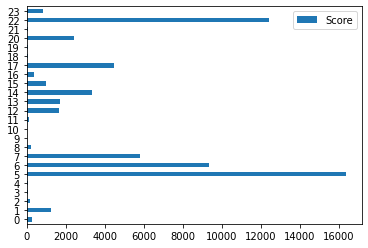

In [273]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [276]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 69.03197790378857
Test Prediction  69.02506513704026


In [278]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  47.01589694394957


In [279]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  46.97809719370294


In [280]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  47.63860369609856


In [281]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  45.07


In [282]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  46.93666666666667


In [283]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  31.076666666666668


In [284]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  51.55917411664538


In [285]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
5,vnet,5.597345
3,flit_id,3.903515
23,vnet_vc_cc_index,2.840087
22,vnet_vc_index,2.638018
10,hop_percentage,1.970798
8,hop_count,1.750583
15,packet_count_index,1.463824
0,outport,0.892998
21,cache_coherence_vnet_index,0.639892
17,port_index,0.611071


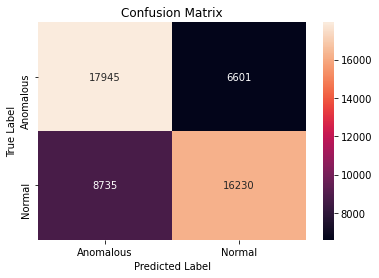

In [286]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70     24546
           1       0.71      0.65      0.68     24965

    accuracy                           0.69     49511
   macro avg       0.69      0.69      0.69     49511
weighted avg       0.69      0.69      0.69     49511



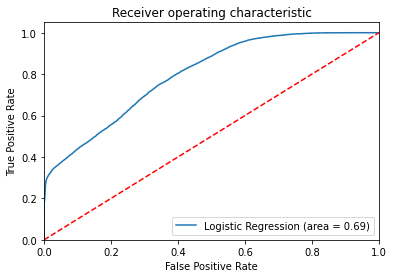

In [288]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

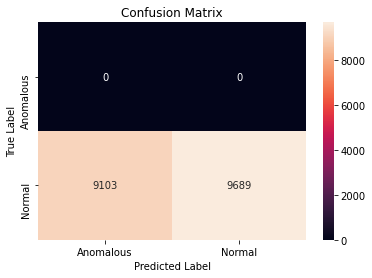

In [289]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [290]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.68     18792

    accuracy                           0.52     18792
   macro avg       0.50      0.26      0.34     18792
weighted avg       1.00      0.52      0.68     18792



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [291]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [293]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.52190180920306
Test Prediction  80.02060148249885


In [294]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.60504316842538


In [295]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  79.04175222450377


In [296]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.01437371663243


In [297]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  60.9


In [298]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  74.22666666666666


In [299]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  15.653333333333332


In [300]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  19.040017028522776


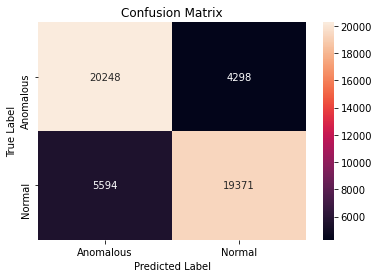

In [301]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [302]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     24546
           1       0.82      0.78      0.80     24965

    accuracy                           0.80     49511
   macro avg       0.80      0.80      0.80     49511
weighted avg       0.80      0.80      0.80     49511



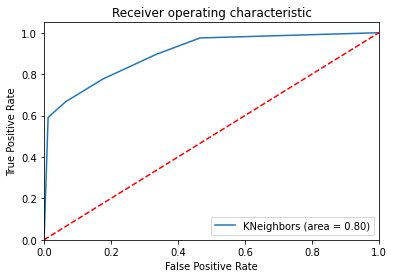

In [303]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

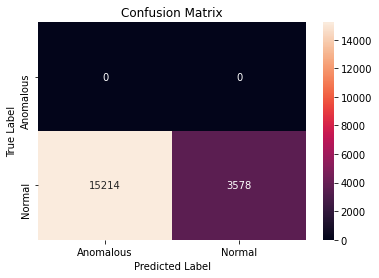

In [304]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [305]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.19      0.32     18792

    accuracy                           0.19     18792
   macro avg       0.50      0.10      0.16     18792
weighted avg       1.00      0.19      0.32     18792



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [307]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [309]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.16875123079332
Test Prediction Score 59.936175799317326


In [310]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 64.75949020145265


In [311]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  64.69199178644763


In [312]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  64.1409993155373


In [313]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  66.86999999999999


In [314]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  67.10666666666667


In [315]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  52.97333333333333


In [316]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  31.891230310770542


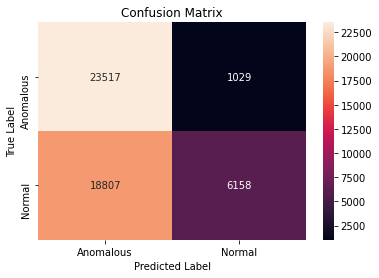

In [317]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [318]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      0.96      0.70     24546
           1       0.86      0.25      0.38     24965

    accuracy                           0.60     49511
   macro avg       0.71      0.60      0.54     49511
weighted avg       0.71      0.60      0.54     49511



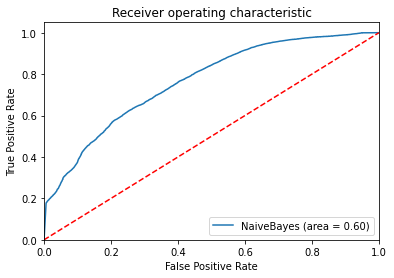

In [319]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [321]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 158434 samples, validate on 39609 samples
Epoch 1/10
158434/158434 [==============================] - 6s 37us/step - loss: 0.1976 - accuracy: 0.6933 - val_loss: 0.1828 - val_accuracy: 0.7131
Epoch 2/10
158434/158434 [==============================] - 6s 37us/step - loss: 0.1768 - accuracy: 0.7135 - val_loss: 0.1743 - val_accuracy: 0.7160
Epoch 3/10
158434/158434 [==============================] - 6s 37us/step - loss: 0.1722 - accuracy: 0.7174 - val_loss: 0.1712 - val_accuracy: 0.7198
Epoch 4/10
158434/158434 [==============================] - 6s 37us/step - loss: 0.1706 - accuracy: 0.7182 - val_loss: 0.1707 - val_accuracy: 0.7182
Epoch 5/10
158434/158434 [==============================] - 6s 37us/step - loss: 0.1698 - accuracy: 0.7183 - val_loss: 0.1697 - val_accuracy: 0.7206
Epoch 6/10
158434/158434 [==============================] - 6s 37us/step - loss: 0.1694 - accuracy: 0.7194 - val_loss: 0.1693 - val_accuracy: 0.7228
Epoch 7/10
158434/158434 [=============================

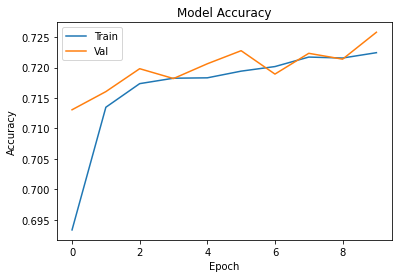

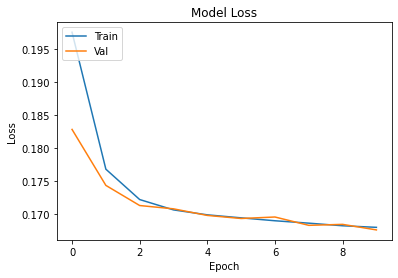

In [322]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [323]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.42%


In [324]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.26%


In [325]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.83%


In [326]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.81%


In [327]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 51.29%


In [328]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 53.83%


In [329]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 19.68%


In [330]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 45.11%


3-Layer Neural Network

In [331]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 158434 samples, validate on 39609 samples
Epoch 1/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2421 - accuracy: 0.5736 - val_loss: 0.2375 - val_accuracy: 0.5837
Epoch 2/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2346 - accuracy: 0.5888 - val_loss: 0.2332 - val_accuracy: 0.5863
Epoch 3/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2315 - accuracy: 0.5929 - val_loss: 0.2309 - val_accuracy: 0.5912
Epoch 4/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2286 - accuracy: 0.5997 - val_loss: 0.2267 - val_accuracy: 0.6048
Epoch 5/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2253 - accuracy: 0.6095 - val_loss: 0.2252 - val_accuracy: 0.6109
Epoch 6/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2240 - accuracy: 0.6113 - val_loss: 0.2240 - val_accuracy: 0.6092
Epoch 7/30
158434/158434 [=============================

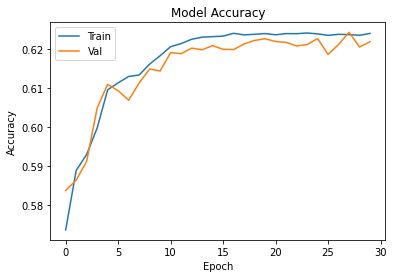

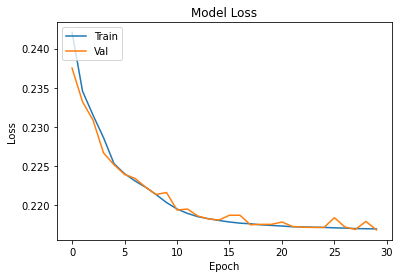

In [332]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [333]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.19%


In [334]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.86%
accuracy: 99.84%
accuracy: 99.86%
accuracy: 86.65%
accuracy: 97.49%
accuracy: 66.44%
accuracy: 0.22%


4-Layer Neural Network



In [335]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 158434 samples, validate on 39609 samples
Epoch 1/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.2356 - accuracy: 0.6177 - val_loss: 0.2088 - val_accuracy: 0.6855
Epoch 2/30
158434/158434 [==============================] - 6s 40us/step - loss: 0.1934 - accuracy: 0.6992 - val_loss: 0.1849 - val_accuracy: 0.7053
Epoch 3/30
158434/158434 [==============================] - 6s 38us/step - loss: 0.1795 - accuracy: 0.7092 - val_loss: 0.1773 - val_accuracy: 0.7112
Epoch 4/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.1719 - accuracy: 0.7144 - val_loss: 0.1705 - val_accuracy: 0.7120
Epoch 5/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.1675 - accuracy: 0.7175 - val_loss: 0.1665 - val_accuracy: 0.7158
Epoch 6/30
158434/158434 [==============================] - 6s 37us/step - loss: 0.1642 - accuracy: 0.7193 - val_loss: 0.1631 - val_accuracy: 0.7186
Epoch 7/30
158434/158434 [=============================

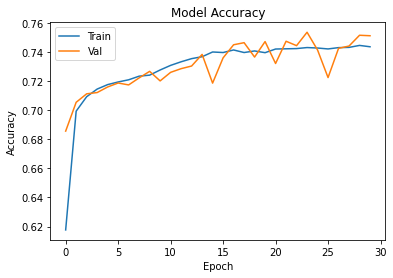

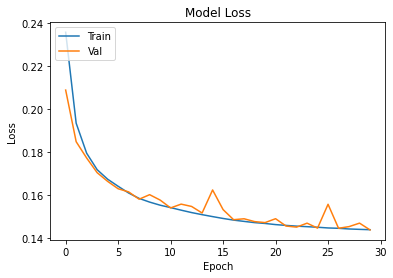

In [336]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [337]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.49%


In [338]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 34.54%
accuracy: 34.72%
accuracy: 35.22%
accuracy: 31.90%
accuracy: 41.98%
accuracy: 16.56%
accuracy: 64.22%


5-Layer Neural Network Optimized

In [339]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 158434 samples, validate on 39609 samples
Epoch 1/100
158434/158434 [==============================] - 11s 72us/step - loss: 0.1574 - accuracy: 0.7284 - val_loss: 0.1427 - val_accuracy: 0.7497
Epoch 2/100
158434/158434 [==============================] - 11s 66us/step - loss: 0.1462 - accuracy: 0.7465 - val_loss: 0.1390 - val_accuracy: 0.7587
Epoch 3/100
158434/158434 [==============================] - 13s 79us/step - loss: 0.1434 - accuracy: 0.7519 - val_loss: 0.1371 - val_accuracy: 0.7590
Epoch 4/100
158434/158434 [==============================] - 11s 69us/step - loss: 0.1418 - accuracy: 0.7548 - val_loss: 0.1370 - val_accuracy: 0.7601
Epoch 5/100
158434/158434 [==============================] - 11s 70us/step - loss: 0.1407 - accuracy: 0.7567 - val_loss: 0.2441 - val_accuracy: 0.6850
Epoch 6/100
158434/158434 [==============================] - 11s 69us/step - loss: 0.1490 - accuracy: 0.7423 - val_loss: 0.1380 - val_accuracy: 0.7635
Epoch 7/100
158434/158434 [================

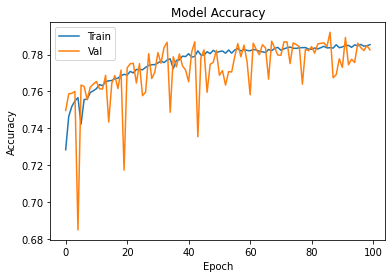

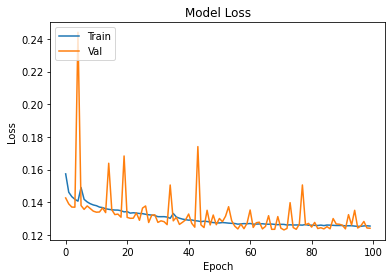

In [340]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [341]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.32%


In [342]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.07%
accuracy: 70.43%
accuracy: 75.24%
accuracy: 63.80%
accuracy: 70.87%
accuracy: 22.91%
accuracy: 28.32%


In [343]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 158434 samples, validate on 39609 samples
Epoch 1/50
158434/158434 [==============================] - 13s 79us/step - loss: 0.1608 - accuracy: 0.7288 - val_loss: 0.1463 - val_accuracy: 0.7403
Epoch 2/50
158434/158434 [==============================] - 13s 79us/step - loss: 0.1498 - accuracy: 0.7439 - val_loss: 0.1413 - val_accuracy: 0.7567
Epoch 3/50
158434/158434 [==============================] - 12s 76us/step - loss: 0.1460 - accuracy: 0.7503 - val_loss: 0.1398 - val_accuracy: 0.7574
Epoch 4/50
158434/158434 [==============================] - 12s 74us/step - loss: 0.1441 - accuracy: 0.7540 - val_loss: 0.1400 - val_accuracy: 0.7589
Epoch 5/50
158434/158434 [==============================] - 12s 75us/step - loss: 0.1431 - accuracy: 0.7563 - val_loss: 0.1379 - val_accuracy: 0.7617
Epoch 6/50
158434/158434 [==============================] - 12s 76us/step - loss: 0.1417 - accuracy: 0.7575 - val_loss: 0.1350 - val_accuracy: 0.7638
Epoch 7/50
158434/158434 [=======================

In [344]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.40%


In [345]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.53%
accuracy: 80.43%
accuracy: 86.69%
accuracy: 70.98%
accuracy: 83.77%
accuracy: 19.79%
accuracy: 26.79%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [347]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [349]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 88.88221244881163
Test Prediction Score 86.39696229120801


In [350]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 63.02932712073455
Test Prediction Score 61.201232032854215
Test Prediction Score 62.91238877481178
Test Prediction Score 55.93666666666667
Test Prediction Score 60.43333333333333
Test Prediction Score 41.91
Test Prediction Score 38.50042571306939


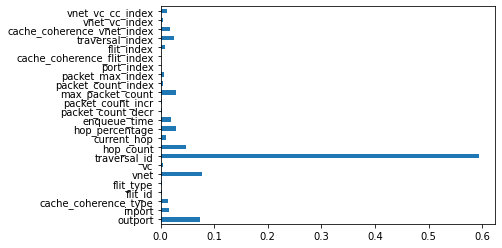

In [351]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

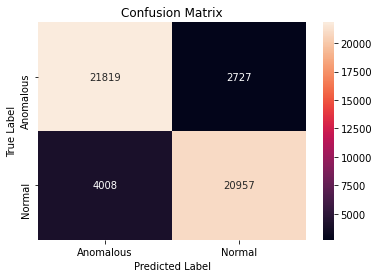

In [352]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [353]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     24546
           1       0.88      0.84      0.86     24965

    accuracy                           0.86     49511
   macro avg       0.86      0.86      0.86     49511
weighted avg       0.87      0.86      0.86     49511



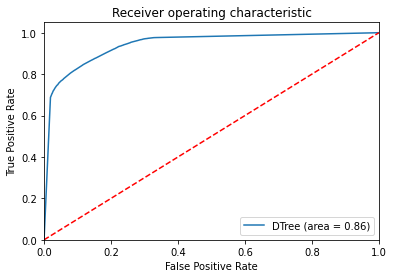

In [354]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [356]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [358]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 92.54909287376984
Test Prediction Score 88.32784633717759


In [359]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 61.96724681375908
Test Prediction Score 60.73579739904176
Test Prediction Score 62.78918548939083
Test Prediction Score 53.74666666666666
Test Prediction Score 59.81666666666666
Test Prediction Score 41.52
Test Prediction Score 37.51064282673478


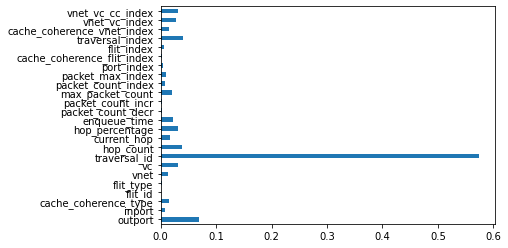

In [360]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

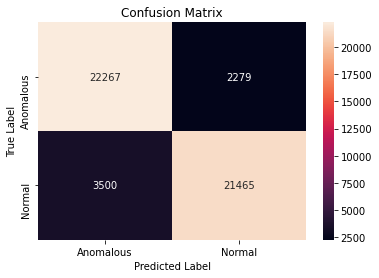

In [361]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [362]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     24546
           1       0.90      0.86      0.88     24965

    accuracy                           0.88     49511
   macro avg       0.88      0.88      0.88     49511
weighted avg       0.88      0.88      0.88     49511



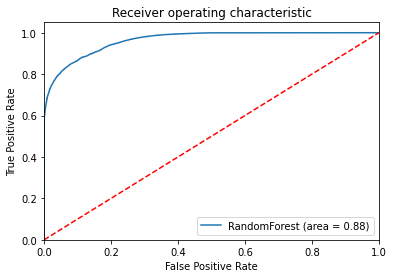

In [363]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [365]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [367]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.59424468423525
Test Prediction Score 93.56506634889217


In [368]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 69.81293682335206
Test Prediction Score 69.84599589322383
Test Prediction Score 71.98151950718685
Test Prediction Score 57.226666666666674
Test Prediction Score 62.153333333333336
Test Prediction Score 36.85333333333333
Test Prediction Score 29.789272030651343


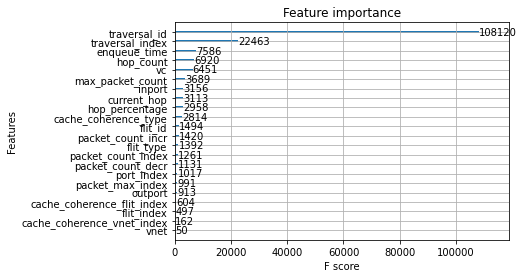

In [369]:
plot_importance(xgbc)
plt.show()

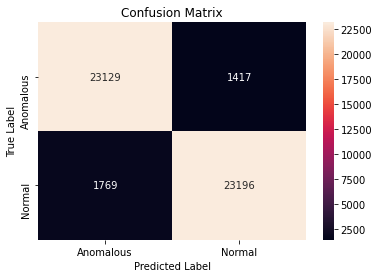

In [370]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [371]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     24546
           1       0.94      0.93      0.94     24965

    accuracy                           0.94     49511
   macro avg       0.94      0.94      0.94     49511
weighted avg       0.94      0.94      0.94     49511



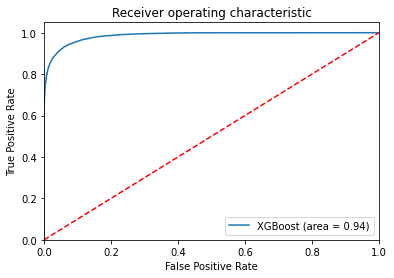

In [372]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [374]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [376]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.46275303848154
Test Prediction Score 83.98739674011836


In [377]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 76.79868439084555
Test Prediction Score 75.24298425735797
Test Prediction Score 77.52566735112937
Test Prediction Score 63.59666666666667
Test Prediction Score 75.55
Test Prediction Score 31.96333333333333
Test Prediction Score 25.074499787143466


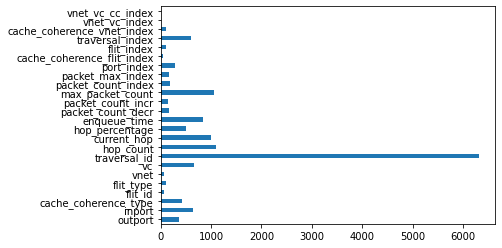

In [378]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

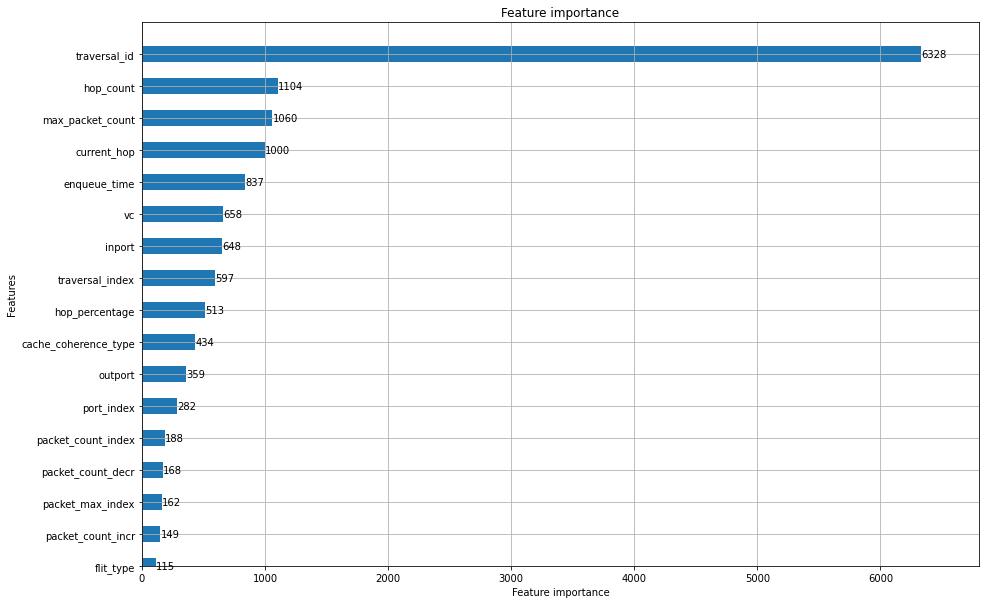

In [379]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [380]:
sorted(gbm.feature_importances_,reverse=True)

[6328,
 1104,
 1060,
 1000,
 837,
 658,
 648,
 597,
 513,
 434,
 359,
 282,
 188,
 168,
 162,
 149,
 115,
 105,
 105,
 67,
 64,
 54,
 3,
 0]

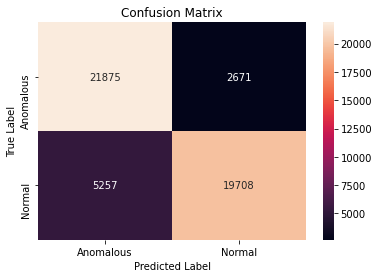

In [381]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [382]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     24546
           1       0.88      0.79      0.83     24965

    accuracy                           0.84     49511
   macro avg       0.84      0.84      0.84     49511
weighted avg       0.84      0.84      0.84     49511



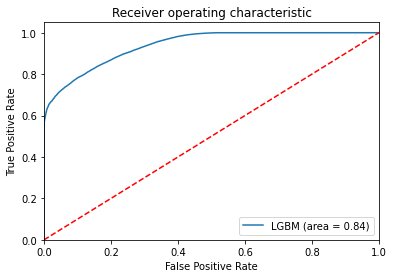

In [383]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()